In [348]:
# On importe les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import os
from matplotlib.animation import FuncAnimation

In [349]:
df = pd.read_csv('Pokedex.csv')
df['IMC'] = df['Weight'] / (df['Height']) ** 2
df['Img'] = df['ID'].apply(lambda name: f'images/{name}.jpg')
type_colors = {
    'Feu': '#FF4500',       # Orange feu
    'Eau': '#1E90FF',       # Bleu océan
    'Plante': '#32CD32',    # Vert nature
    'Électrik': '#FFD700',  # Jaune électrique
    'Psy': '#8A2BE2',       # Violet psychique
    'Roche': '#A0522D',     # Brun roche
    'Glace': '#00CED1',     # Bleu glacier
    'Spectre': '#6A5ACD',   # Indigo
    'Dragon': '#8B0000',    # Rouge dragon
    'Ténèbres': '#2F4F4F',  # Gris foncé
    'Fée': '#FF69B4',       # Rose clair
    'Acier': '#708090',     # Gris acier
    'Combat': '#CD5C5C',    # Rouge combat
    'Insecte': '#9ACD32',   # Vert insecte
    'Normal': '#D3D3D3',    # Gris clair
    'Poison': '#9400D3',    # Violet poison
    'Vol': '#87CEFA',       # Bleu ciel
    'Sol': '#DEB887',       # Beige sol
}
display(df)

ID         Name     Type1    Type2  Total   HP  Attack  Defense  \
0        1   Bulbizarre    Plante   Poison    318   45      49       49   
1        2   Herbizarre    Plante   Poison    405   60      62       63   
2        3   Florizarre    Plante   Poison    525   80      82       83   
3        4    Salamèche       Feu      NaN    309   39      52       43   
4        5    Reptincel       Feu      NaN    405   58      64       58   
...    ...          ...       ...      ...    ...  ...     ...      ...   
1020  1021   Ire-Foudre  Électrik   Dragon    590  125      73       91   
1021  1022   Roc-de-Fer     Roche      Psy    590   90     120       80   
1022  1023  Chef-de-Fer     Acier      Psy    590   90      72      100   
1023  1024    Terapagos    Normal      NaN    450   90      65       85   
1024  1025   Pêchaminus    Poison  Spectre    600   88      88      160   

      Sp. Atk  Sp. Def  Speed  Generation  Height  Weight         IMC  \
0          65       65     45           1     0.7     6.9   14.081633   
1          80       80     60           1     1.0    13.0   13.000000   
2         100      100     80           1     2.0   100.0   25.000000   
3          60       50     65           1     0.6     8.5   23.611111   
4          80       65     80           1     1.1    19.0   15.702479   
...       ...      ...    ...         ...     ...     ...         ...   
1020      137       89     75           9     5.2   480.0   17.751479   
1021       68      108    124           9     1.5   162.5   72.222222   
1022      122      108     98           9     1.6   156.0   60.937500   
1023       65       85     60           9     0.2     6.5  162.500000   
1024       88       88     88           9     0.3     0.3    3.333333   

                  Img  
0        images/1.jpg  
1        images/2.jpg  
2        images/3.jpg  
3        images/4.jpg  
4        images/5.jpg  
...               ...  
1020  images/1021.jpg  
1021  images/1022.jpg  
1022  images/1023.jpg  
1023  images/1024.jpg  
1024  images/1025.jpg  

[1025 rows x 16 columns]

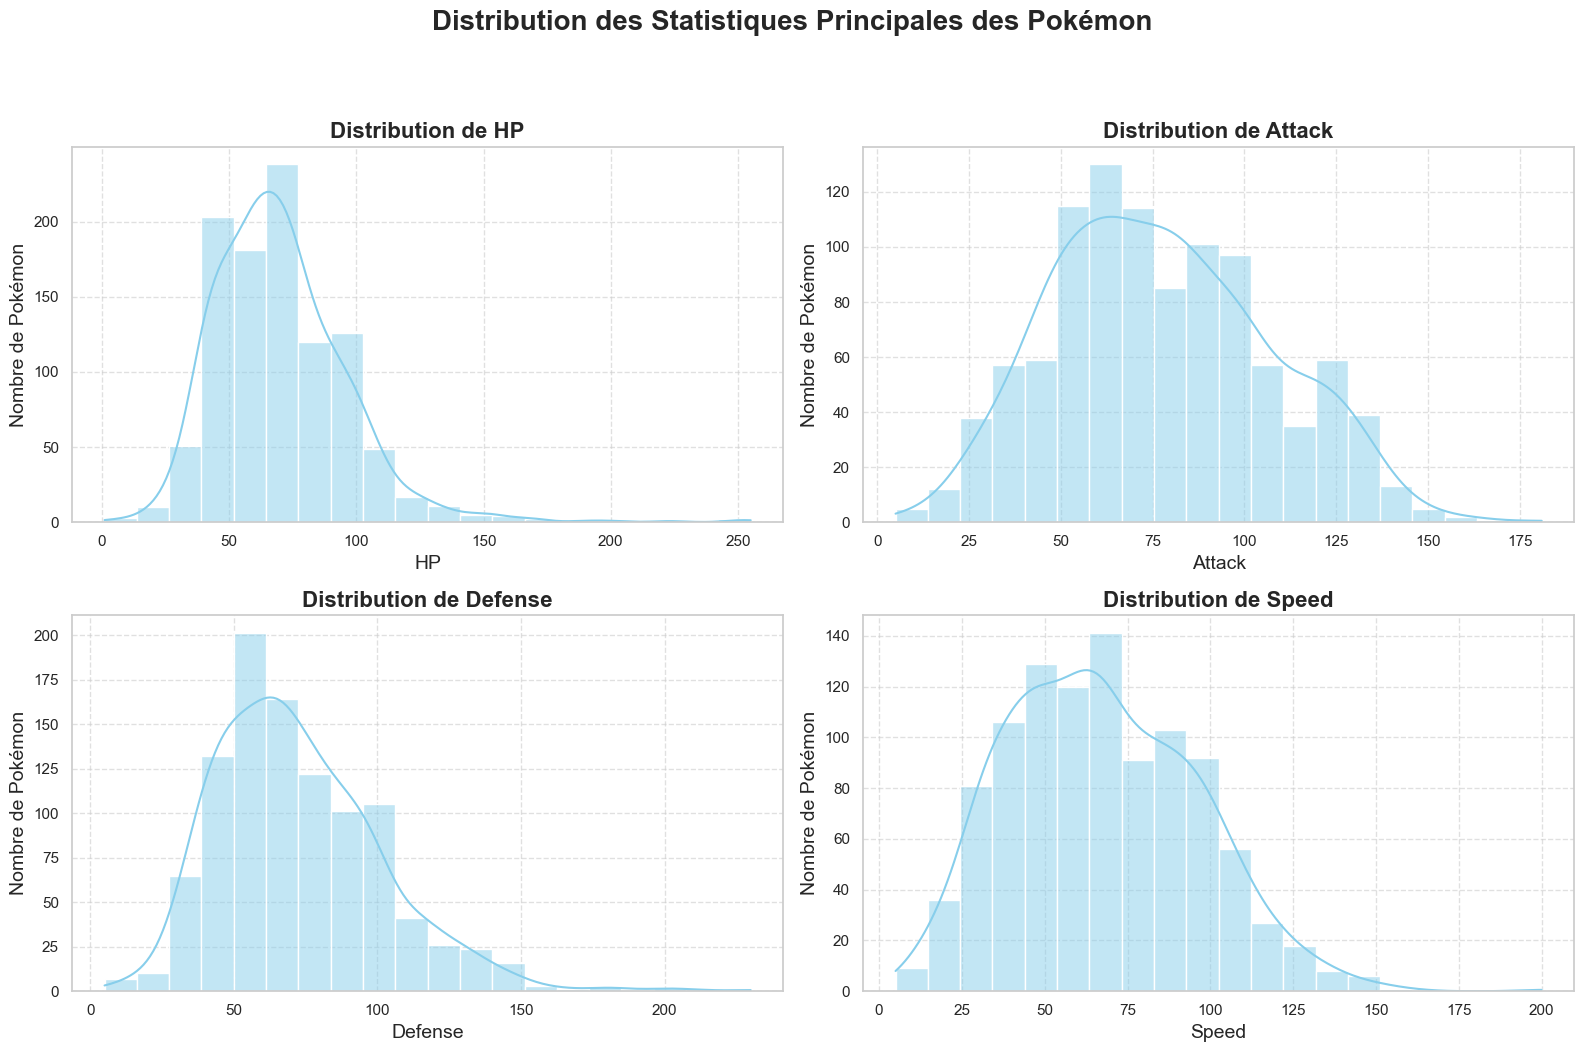

In [350]:
# Distribution des statistiques principales

# Appliquer un joli style Seaborn
sns.set(style="whitegrid")

# Définir les colonnes qu'on veut visualiser
stats_to_plot = ['HP', 'Attack', 'Defense', 'Speed']

# Créer une figure avec 2x2 sous-graphes
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Plus simple pour itérer

# Boucle sur les stats pour créer un histogramme par stat
for idx, stat in enumerate(stats_to_plot):
    sns.histplot(data=df, x=stat, kde=True, color="skyblue", bins=20, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {stat}', fontsize=16, fontweight='bold')
    axes[idx].set_xlabel(stat, fontsize=14)
    axes[idx].set_ylabel('Nombre de Pokémon', fontsize=14)
    axes[idx].grid(True, linestyle='--', alpha=0.6)

# Titre principal
fig.suptitle('Distribution des Statistiques Principales des Pokémon', fontsize=20, fontweight='bold', y=1.05)

# Ajuster l'espace
plt.tight_layout()
plt.show()

In [351]:
# Distribution des types de Pokémon

# 1. Pie Chart pour Type1
type1_counts = df['Type1'].value_counts().reset_index()
type1_counts.columns = ['Type1', 'Count']

fig1 = px.pie(
    type1_counts,
    names='Type1',
    values='Count',
    title='Répartition des Pokémon par Type Principal (Type1)',
    color='Type1',
    color_discrete_map=type_colors  # 🎯 Palette personnalisée
)

fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.update_layout(width=800, height=700)
fig1.show()

# 2. Pie Chart pour Type2 (sans NaN)
type2_counts = df['Type2'].dropna().value_counts().reset_index()
type2_counts.columns = ['Type2', 'Count']

fig2 = px.pie(
    type2_counts,
    names='Type2',
    values='Count',
    title='Répartition des Pokémon par Type Secondaire (Type2)',
    color='Type2',
    color_discrete_map=type_colors  # 🎯 Même palette pour Type2
)

fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(width=800, height=700)
fig2.show()

In [352]:
# Bubble chart interactif

# Grouper par Type1 et faire la moyenne
df_grouped = df.groupby('Type1').mean(numeric_only=True).reset_index()

# Bubble Chart
fig = px.scatter(
    df_grouped,
    x='Attack',
    y='Speed',
    size='HP',
    color='Type1',
    hover_name='Type1',
    size_max=40,
    labels={'Attack': 'Attack Moyen', 'Speed': 'Speed Moyen', 'HP': 'HP Moyen'},
    title='Bubble Chart interactif : Attack vs Speed (taille = HP moyen)',
    color_discrete_map=type_colors  # 🎯 Ici on passe notre palette personnalisée
)

# Mise en forme
fig.update_layout(
    width=1000,
    height=700,
    title_font=dict(size=24),
    plot_bgcolor='white',
    xaxis=dict(
        title='Attack Moyen',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    yaxis=dict(
        title='Speed Moyen',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    )
)

# Afficher le graphique
fig.show()

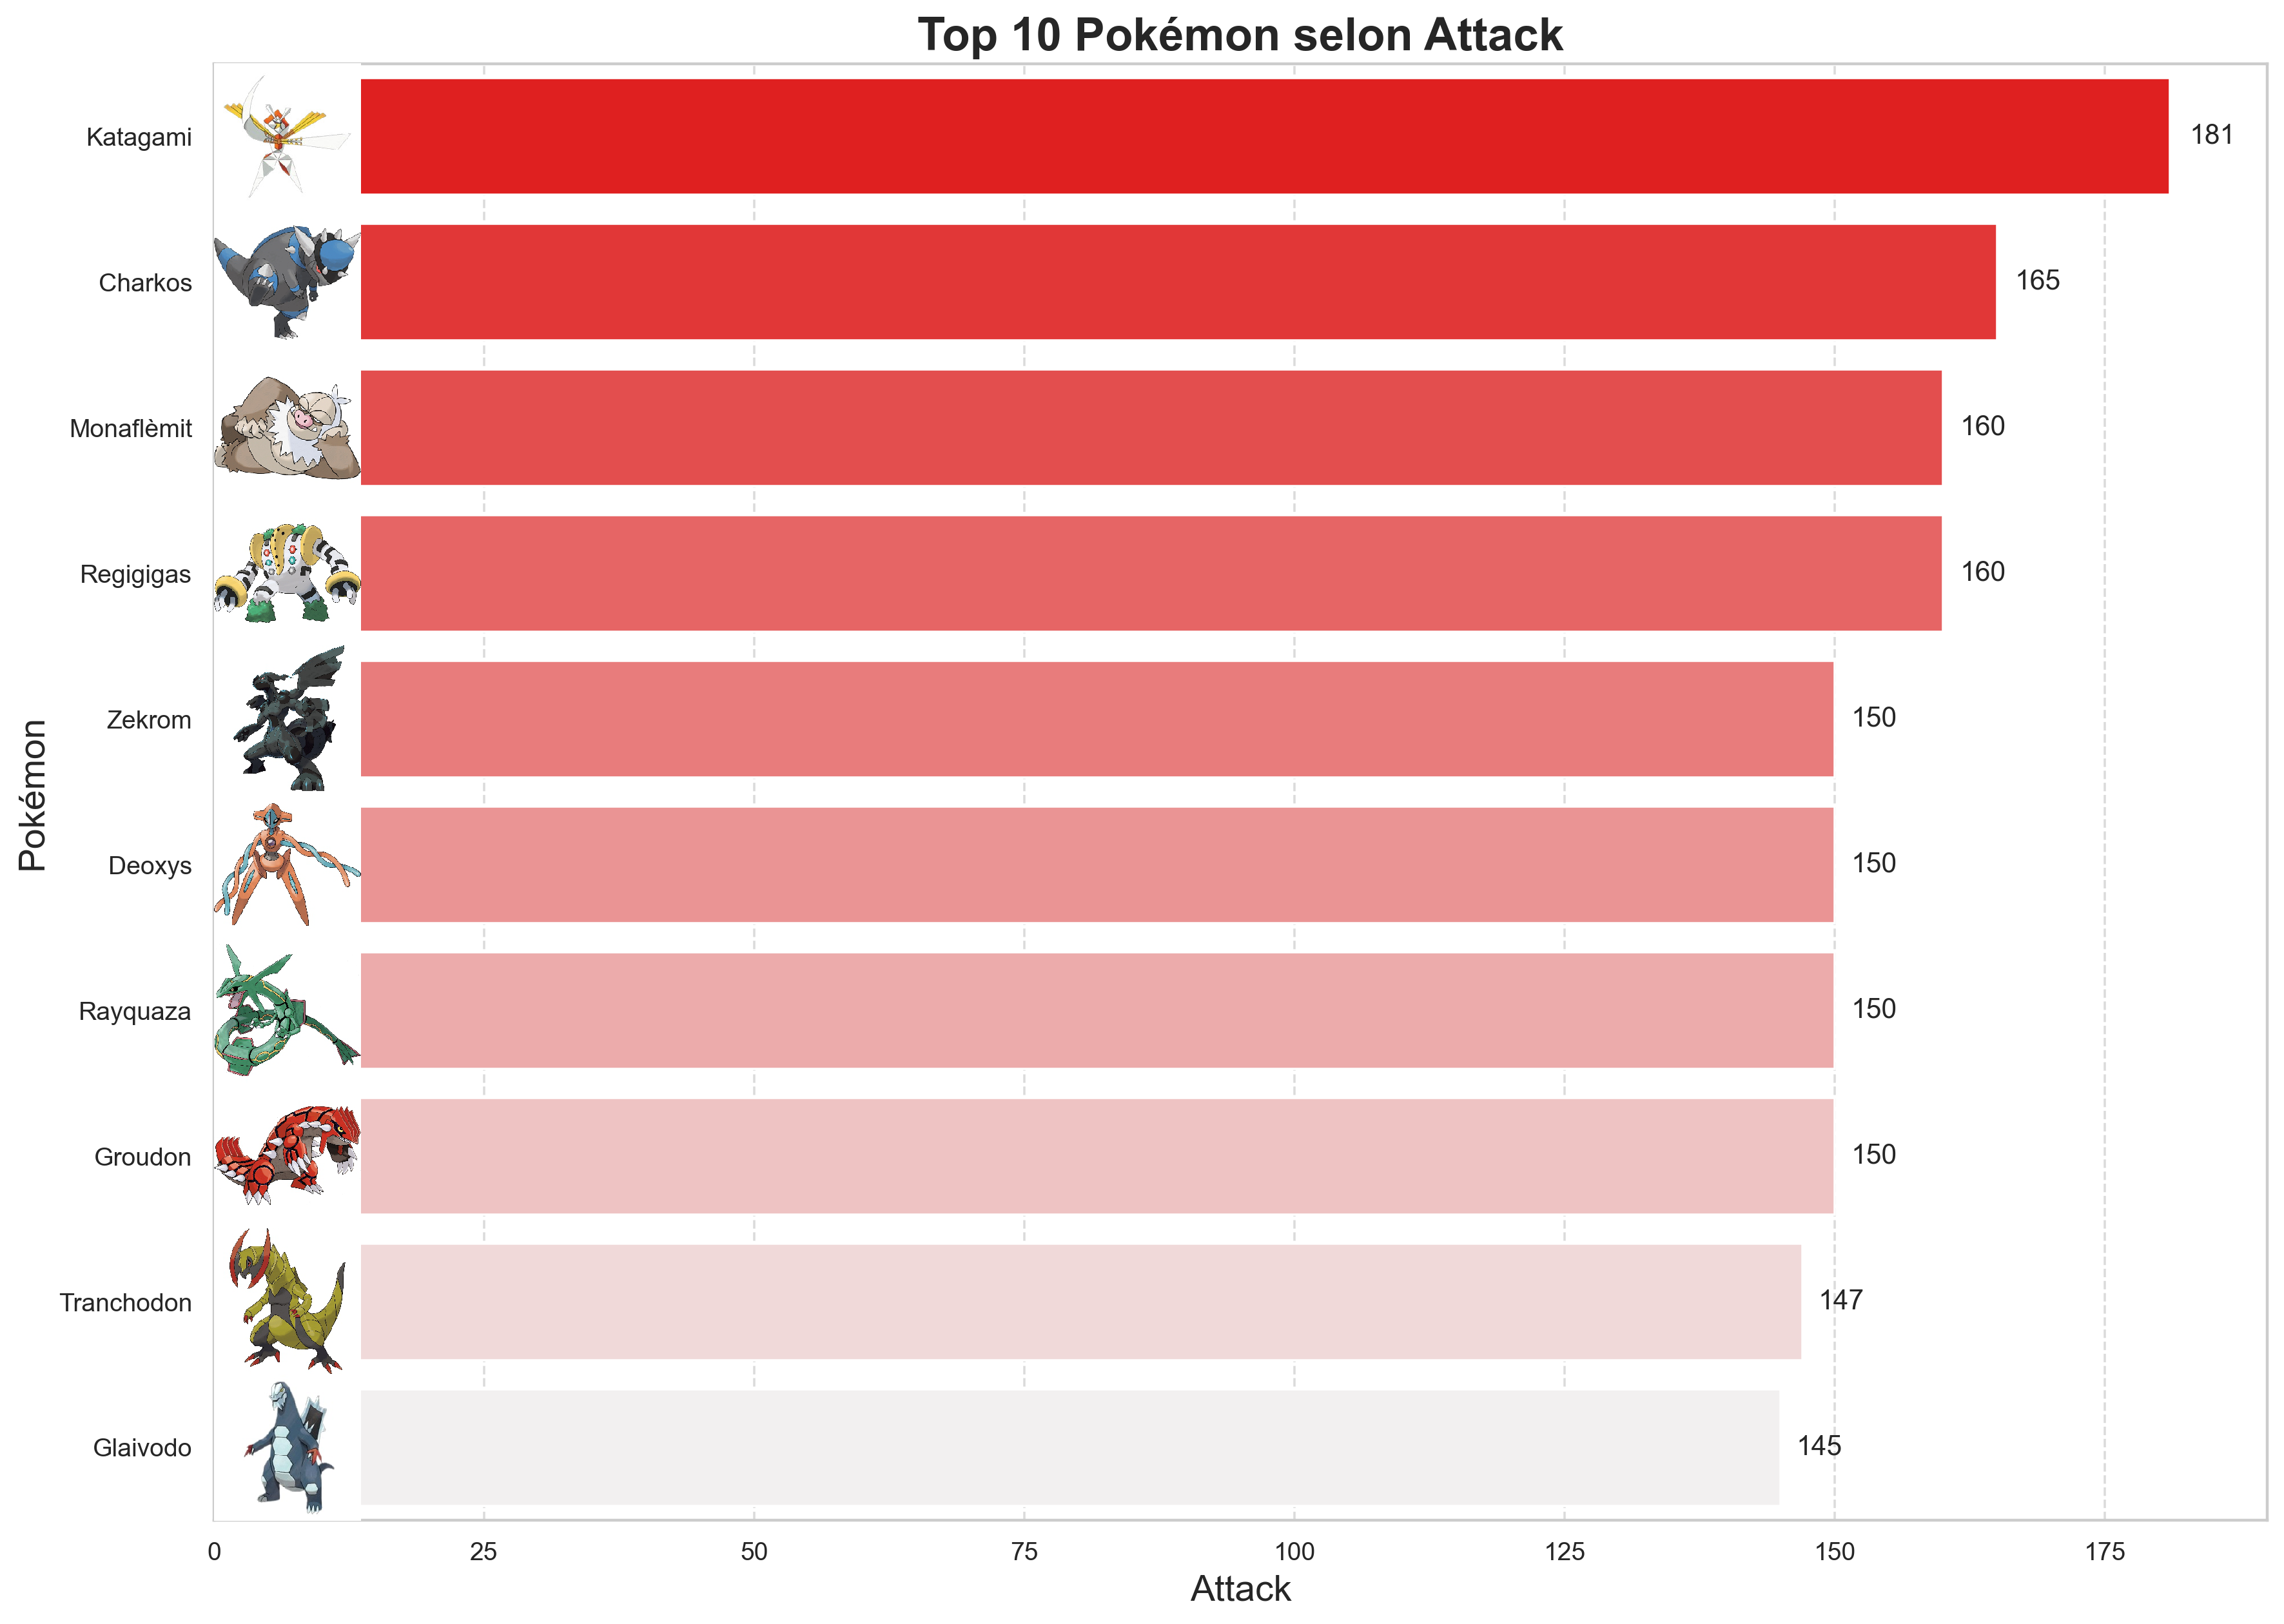

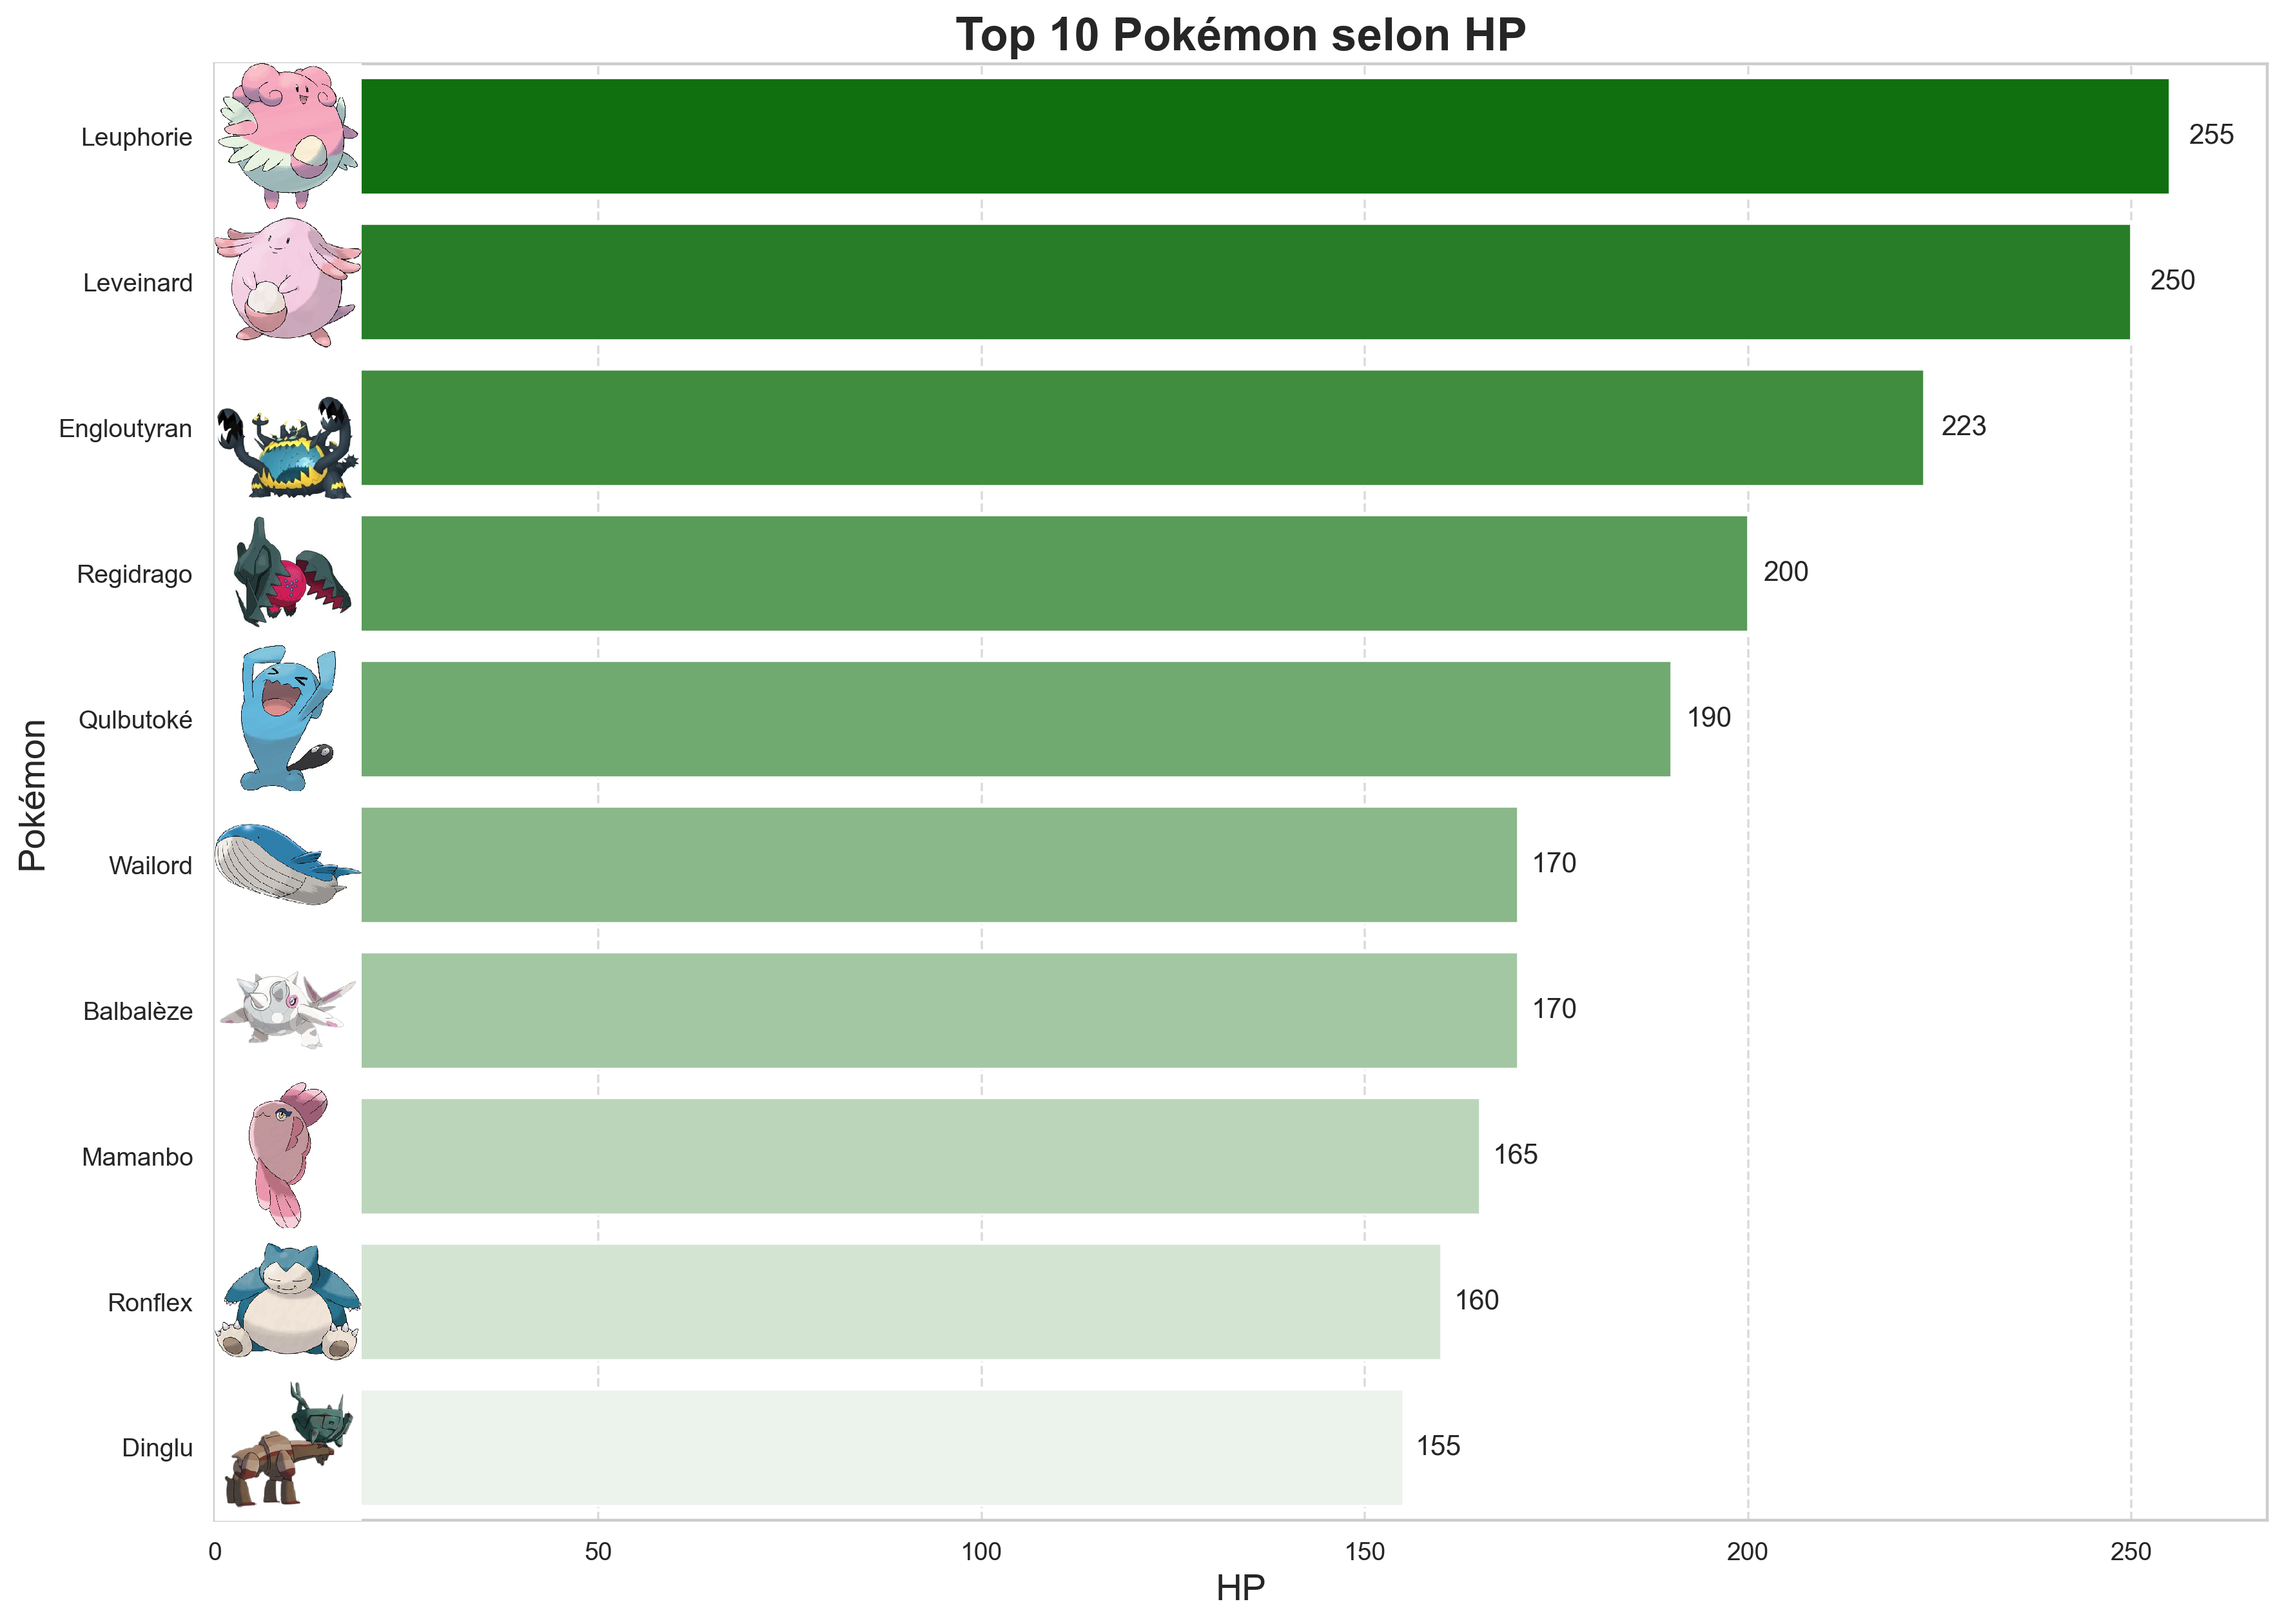

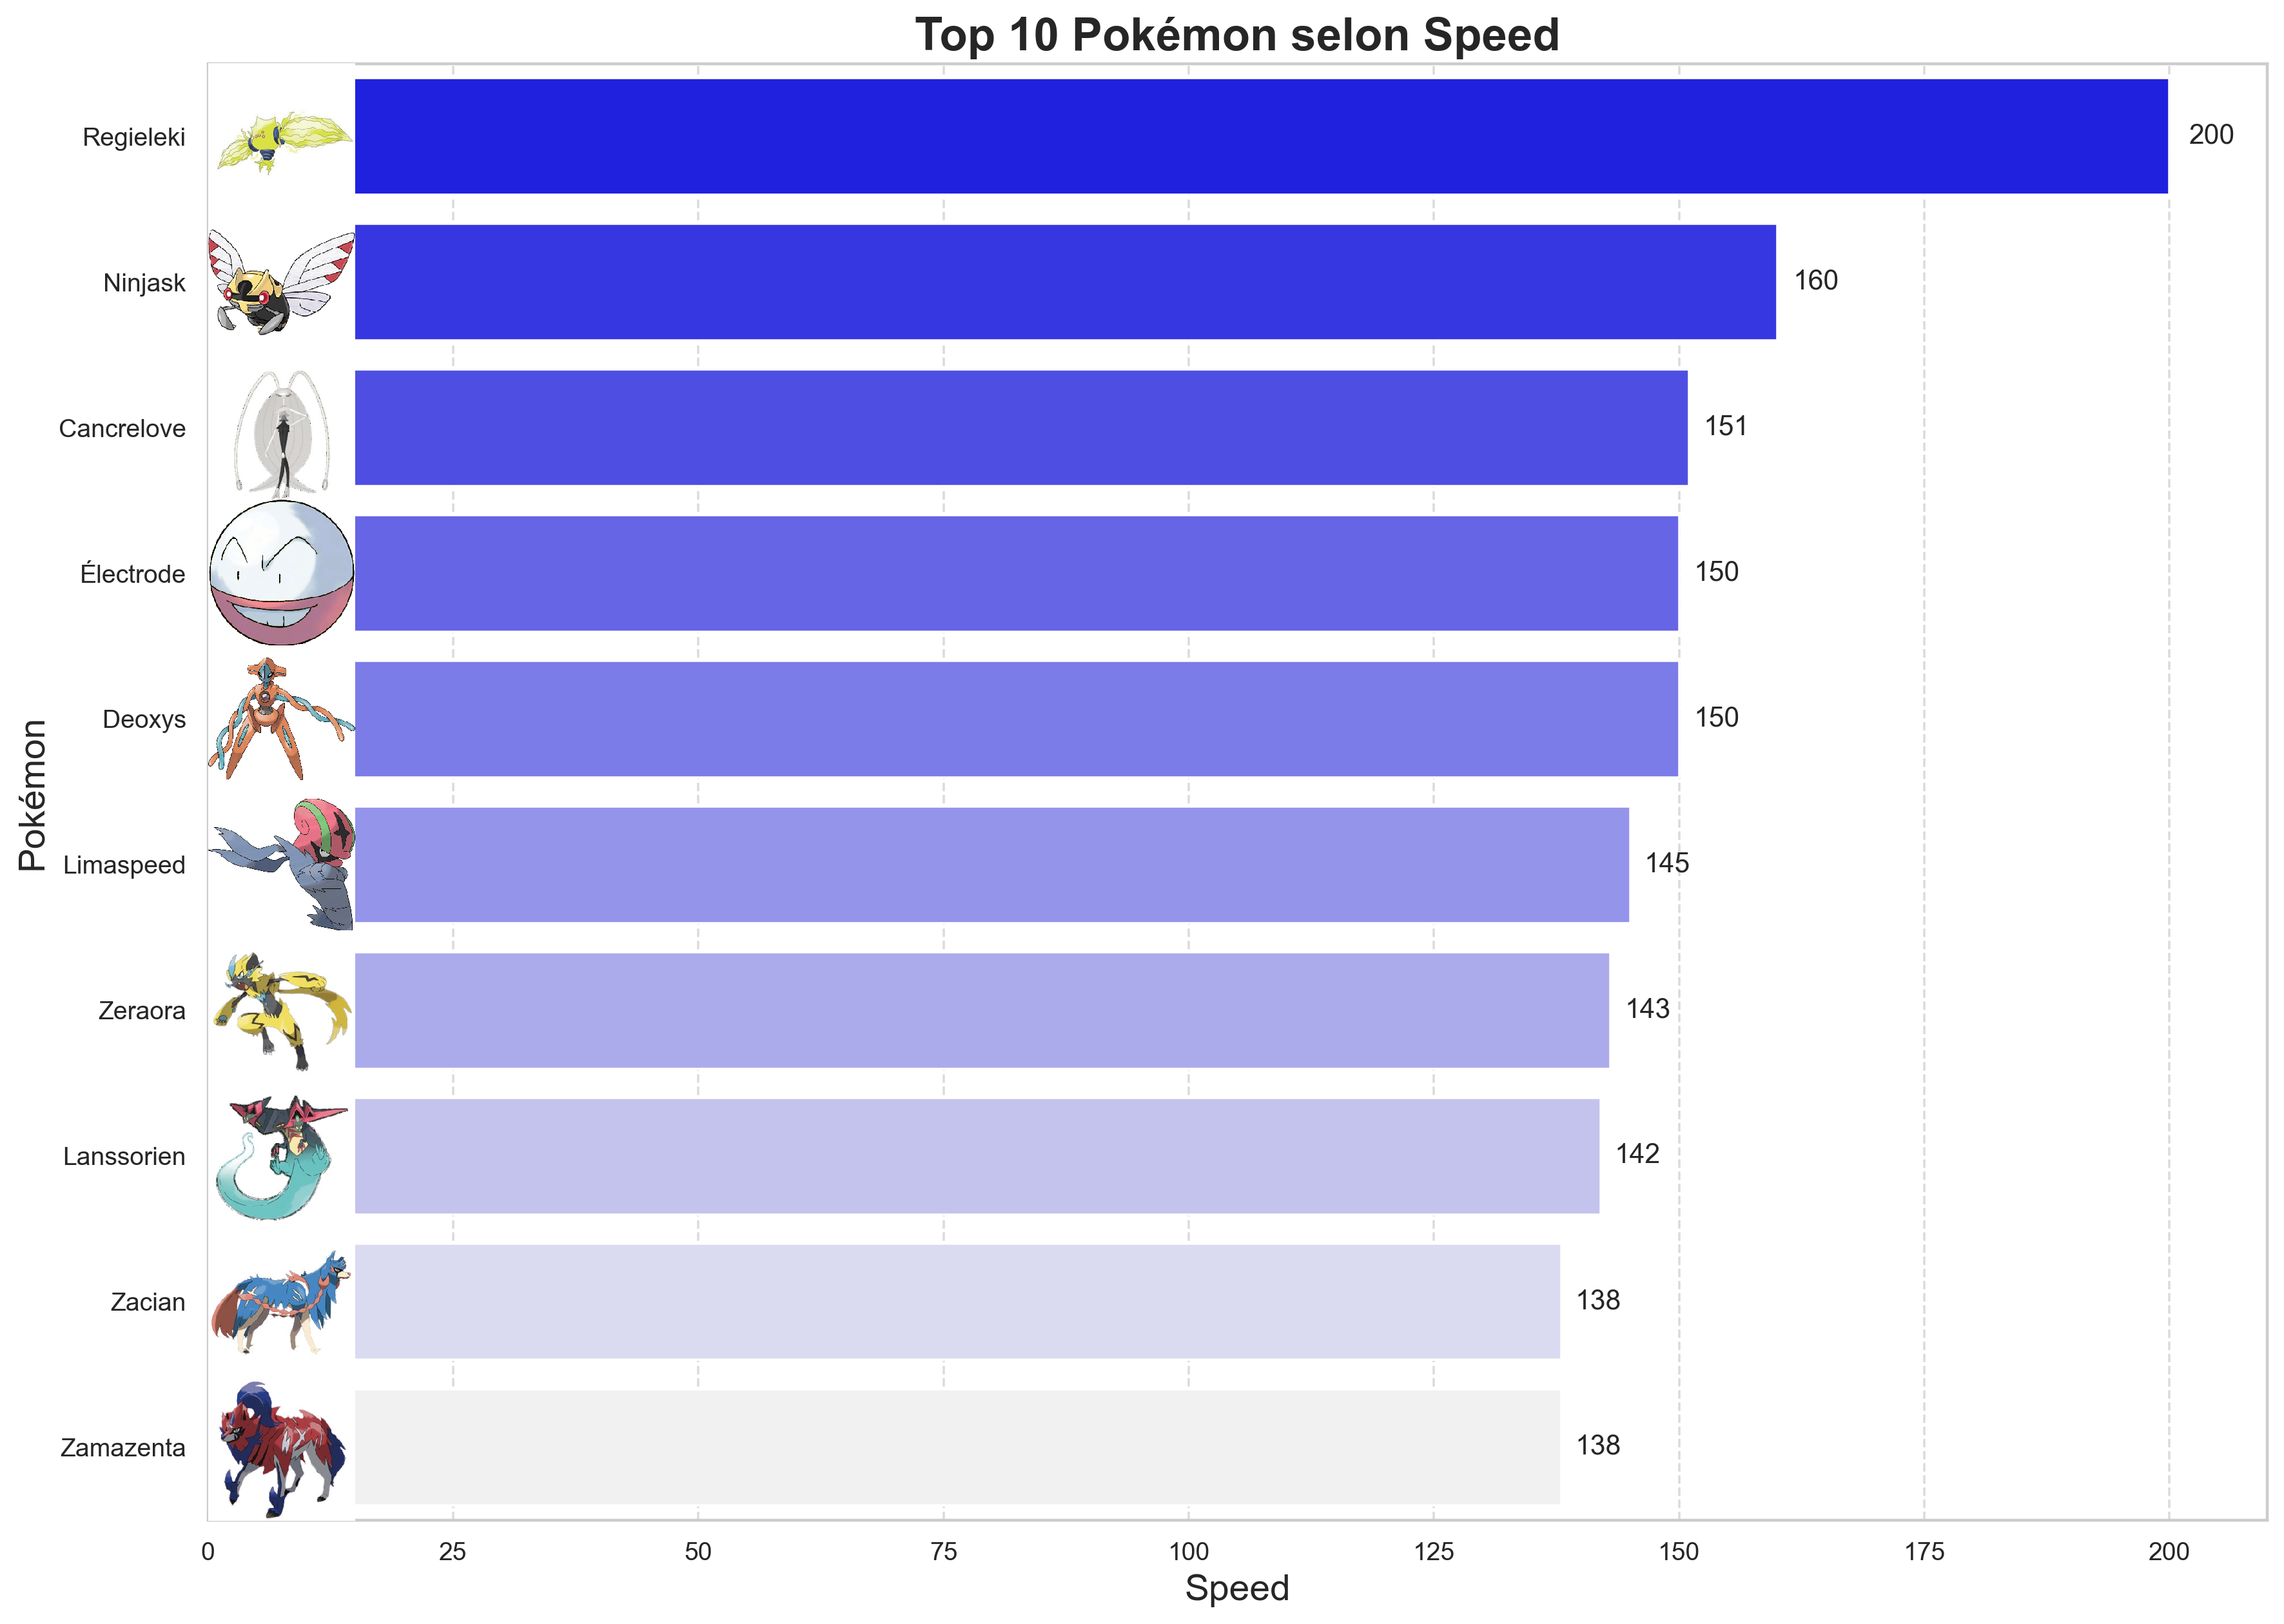

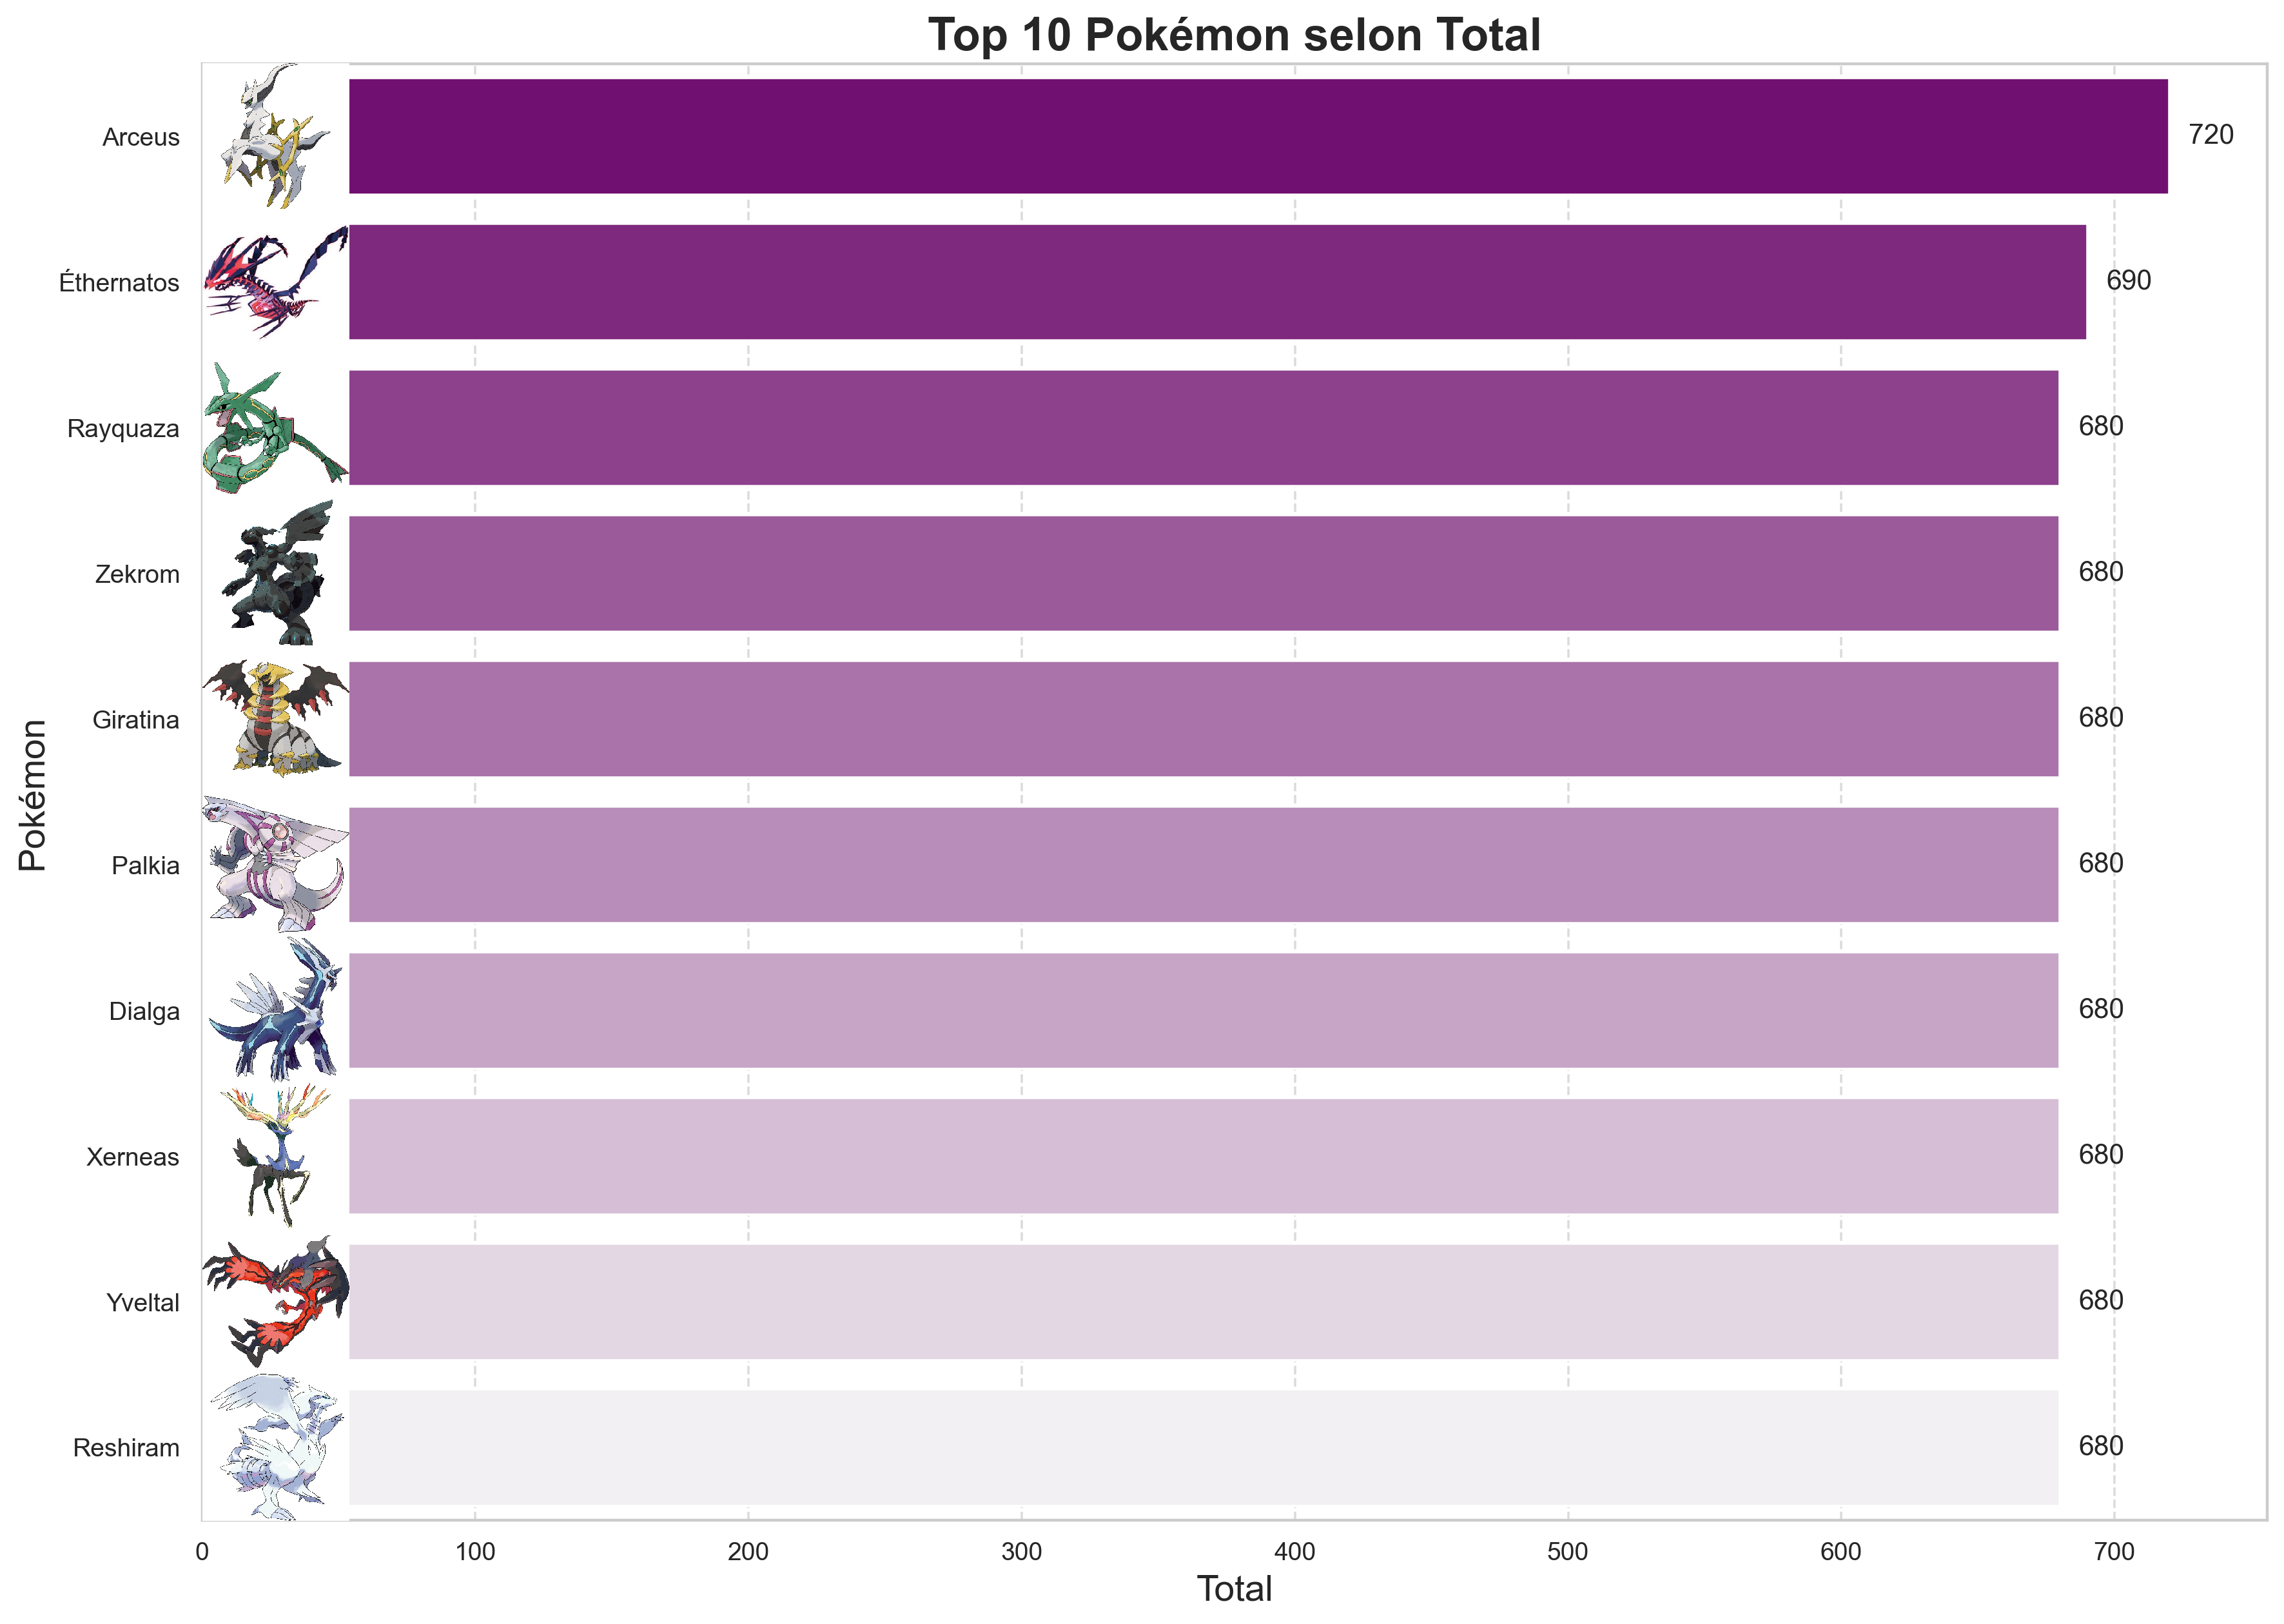

In [353]:
# Top 10 Pokémon par Statistiques

# Style Seaborn
sns.set(style="whitegrid")

def plot_top_bar_chart_with_images(df, stat, top_n=10, color='skyblue'):
    # Trier les données
    top_pokemon = df.sort_values(by=stat, ascending=False).head(top_n).reset_index()

    # Créer la figure
    fig, ax = plt.subplots(figsize=(14, 10), dpi=256)
    
    # Barplot
    sns.barplot(
        data=top_pokemon,
        x=stat,
        y='Name',
        hue='Name',
        palette=sns.light_palette(color, n_colors=top_n, reverse=True),
        legend=False,
        ax=ax
    )
    
    # Titre et labels
    ax.set_title(f'Top {top_n} Pokémon selon {stat}', fontsize=20, fontweight='bold')
    ax.set_xlabel(stat, fontsize=16)
    ax.set_ylabel('Pokémon', fontsize=16)
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Forcer l'axe X à commencer à 0
    ax.set_xlim(left=0)

    # Afficher la valeur sur chaque barre
    for index, value in enumerate(top_pokemon[stat]):
        plt.text(value + (value * 0.01), index, str(int(value)), va='center', fontsize=12)

    # Ajouter les images avec léger décalage constant
    yticklabels = ax.get_yticklabels()
    for idx, label in enumerate(yticklabels):
        name = label.get_text()
        img_path = top_pokemon[top_pokemon['Name'] == name]['Img'].values[0]
        
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            imagebox = OffsetImage(img, zoom=0.25, interpolation='nearest')
            # (x fraction, y index en coordonnée de données)
            ab = AnnotationBbox(
                imagebox,
                (0, idx),
                xycoords=('axes fraction', 'data'),
                box_alignment=(0, 0.5),
                frameon=False
            )
            ax.add_artist(ab)

    plt.tight_layout()
    plt.show()

# 1. Top 10 Attack avec images
plot_top_bar_chart_with_images(df, stat='Attack', top_n=10, color='red')

# 2. Top 10 Defense avec images
plot_top_bar_chart_with_images(df, stat='HP', top_n=10, color='green')

# 3. Top 10 Speed avec images
plot_top_bar_chart_with_images(df, stat='Speed', top_n=10, color='blue')

# 4. Top 10 Total avec images
plot_top_bar_chart_with_images(df, stat='Total', top_n=10, color='purple')

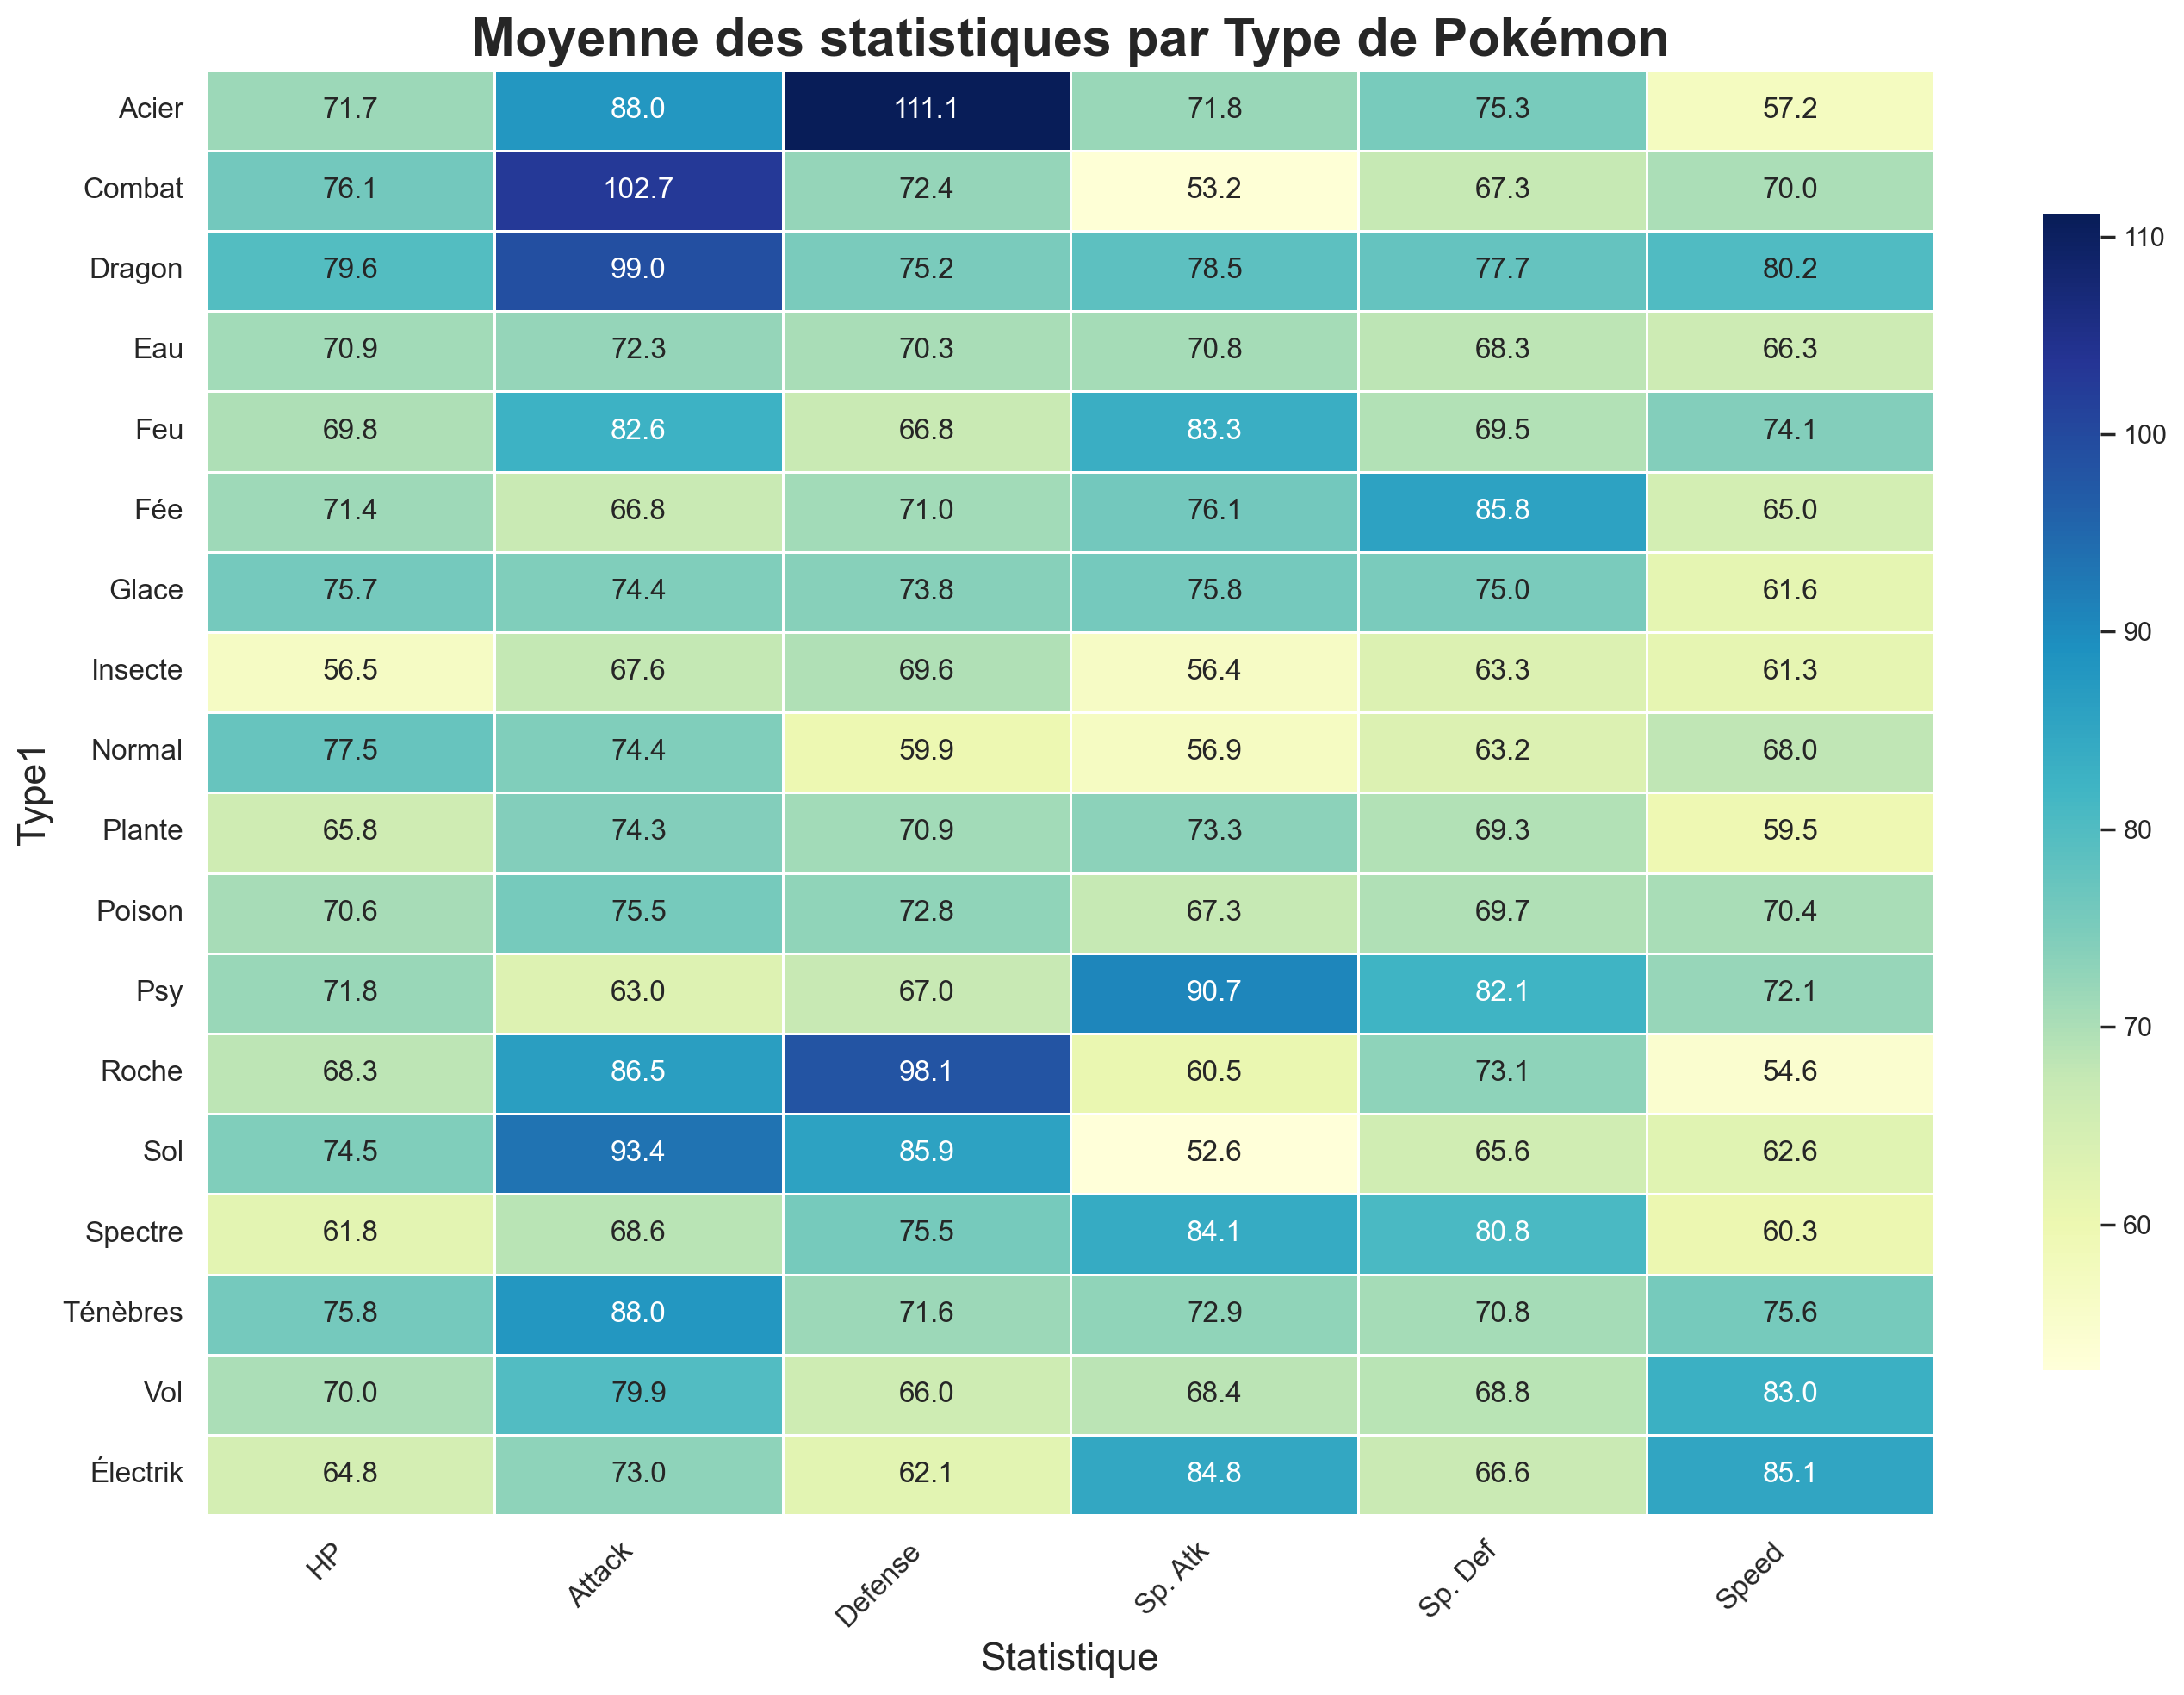

In [354]:
# Heamap de la moyenne des stats par Type

# Style seaborn
sns.set(style="whitegrid")

# Sélectionner les colonnes d'intérêt
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Grouper par Type1 et faire la moyenne
type_grouped = df.groupby('Type1')[stats_cols].mean().round(1)

# Créer la figure
plt.figure(figsize=(14, 10), dpi=200)

# Heatmap
sns.heatmap(
    type_grouped,
    annot=True,              # Affiche les moyennes
    fmt=".1f",                # 1 décimale
    cmap="YlGnBu",            # Palette de couleurs plus douce (Jaune-Vert-Bleu)
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8}
)

plt.title('Moyenne des statistiques par Type de Pokémon', fontsize=22, fontweight='bold')
plt.xlabel('Statistique', fontsize=16)
plt.ylabel('Type1', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [355]:
# Radar Chart des Types Pokémon

# Colonnes statistiques
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Grouper par Type1 et prendre la moyenne
type_grouped = df.groupby('Type1')[stats_cols].mean()

# Créer la figure
fig = go.Figure()

# Ajouter une trace pour chaque Type1
for poke_type in type_grouped.index:
    values = type_grouped.loc[poke_type].tolist()
    values += values[:1]  # Fermer le radar

    color = type_colors.get(poke_type, '#808080')

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=stats_cols + [stats_cols[0]],
        fill='toself',
        name=poke_type,
        line=dict(color=color),
        visible=True
    ))

# Mettre à jour le layout
fig.update_layout(
    width=1000,
    height=900,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 120]
        )
    ),
    showlegend=True,
    title="Radar Chart des Types Pokémon (Stats Moyennes)",
    title_font=dict(size=24)
)

# Afficher
fig.show()

In [356]:
# Line graph des Statistiques par Génération

# Colonnes statistiques
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

# Grouper par génération et faire la moyenne
generation_grouped = df.groupby('Generation')[stats_cols].mean().reset_index()

# Passer en format "long" pour Plotly
df_melted = generation_grouped.melt(id_vars='Generation', value_vars=stats_cols,
                                    var_name='Stat', value_name='Moyenne')

# Palette de couleurs personnalisée
custom_colors = {
    'HP': '#FF5733',       # Rouge orangé
    'Attack': '#33C1FF',   # Bleu clair
    'Defense': '#33FFB5',  # Vert clair
    'Sp. Atk': '#FF33E3',  # Rose fuchsia
    'Sp. Def': '#FFC733',  # Jaune vif
    'Speed': '#8E44AD',    # Violet foncé
    'Total': '#2ECC71'     # Vert émeraude
}

# Créer la figure interactive
fig = px.line(
    df_melted,
    x='Generation',
    y='Moyenne',
    color='Stat',
    markers=True,
    title='Évolution des statistiques moyennes des Pokémon au fil des générations',
    labels={
        'Generation': 'Génération',
        'Moyenne': 'Valeur moyenne',
        'Stat': 'Statistique'
    },
    color_discrete_map=custom_colors  # 🎯 Couleurs fixées
)

# Customiser l'apparence
fig.update_layout(
    width=1000,
    height=600,
    title_font=dict(size=24, family='Arial', color='black'),
    legend_title_text='Statistique',
    legend=dict(font=dict(size=12)),
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        tickmode='linear',
        tick0=1,
        dtick=1
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    )
)

# Afficher
fig.show()

In [357]:
# Bubble Chart par Pokémon

fig = px.scatter(
    df,
    x='Attack',
    y='HP',
    size='Speed',
    color='Type1',  # Couleur par Type1
    hover_name='Name',
    size_max=40,   # Taille max des bulles
    labels={'Attack': 'Attack', 'Speed': 'Speed', 'HP': 'HP'},
    title='Bubble Chart par Pokémon : Attack vs HP (taille = Speed)',
    color_discrete_map=type_colors
)

# Mise en forme
fig.update_layout(
    width=1200,
    height=800,
    title_font=dict(size=24),
    plot_bgcolor='white',
    xaxis=dict(
        range=[0, df['Attack'].max() + 10],
        title='Attack',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    yaxis=dict(
        range=[0, df['HP'].max() + 10],
        title='HP',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    )
)

# Afficher le graphique
fig.show()

In [358]:
# Bubble Chart avec animation par génération
fig = px.scatter(
    df,
    x='Attack',
    y='HP',
    size='Speed',
    color='Type1',
    hover_name='Name',
    animation_frame='Generation',
    size_max=40,
    labels={'Attack': 'Attack', 'Speed': 'Speed', 'HP': 'HP', 'Generation': 'Génération'},
    title='Bubble Chart Pokémon : Attack vs HP (taille = Speed) - Animation par Génération',
    color_discrete_map=type_colors
)

fig.layout.updatemenus = []
fig.update_layout(
    width=1200,
    height=800,
    plot_bgcolor='white',
    xaxis=dict(
        range=[0, df['Attack'].max() + 10],
        title='Attack',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    yaxis=dict(
        range=[0, df['HP'].max() + 10],
        title='HP',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    title_font=dict(size=24)
)

# Afficher
fig.show()

In [359]:
# Colonnes à utiliser
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calculer la moyenne par Generation et Type1
df_grouped = df.groupby(['Generation', 'Type1'])[stats_cols].mean().reset_index()

# Bubble Chart animé
fig = px.scatter(
    df_grouped,
    x='Attack',
    y='HP',
    size='Speed',
    color='Type1',
    hover_name='Type1',
    animation_frame='Generation',
    size_max=40,
    labels={
        'Attack': 'Attack Moyen',
        'Speed': 'Speed Moyen',
        'HP': 'HP Moyen',
        'Generation': 'Génération'
    },
    title='Bubble Chart Pokémon : Attack vs HP (taille = Speed moyen) - Animation par Génération',
    color_discrete_map=type_colors
)

# Mise en forme
fig.update_layout(
    width=1200,
    height=800,
    plot_bgcolor='white',
    xaxis=dict(
        range=[0, 150],
        title='Attack Moyen',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    yaxis=dict(
        range=[0, 140],
        title='HP Moyen',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    title_font=dict(size=24),
    
    # 🎯 Partie importante pour ralentir :
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1000, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 500}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Génération :",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 500, "easing": "cubic-in-out"},
        "pad": {"b": 10},
        "len": 0.9,
        "x": 0.1,
        "y": -0.2
    }]
)

# Afficher
fig.show()

In [360]:
# Colonnes à utiliser
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calculer la moyenne par Generation et Type1
df_grouped = df.groupby(['Generation', 'Type1'])[stats_cols].mean().reset_index()

# Bubble Chart animé
fig = px.scatter(
    df_grouped,
    x='Attack', 
    y='Speed',
    size='HP',
    color='Type1',
    hover_name='Type1',
    animation_frame='Generation',
    size_max=40,
    labels={
        'Attack': 'Attack Moyen',
        'Speed': 'Speed Moyen',
        'HP': 'HP Moyen',
        'Generation': 'Génération'
    },
    title='Bubble Chart Pokémon : Attack vs Speed (taille = HP moyen) - Animation par Génération',
    color_discrete_map=type_colors
)

# Mise en forme
fig.update_layout(
    width=1200,
    height=800,
    plot_bgcolor='white',
    xaxis=dict(
        title='Attack Moyen',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    yaxis=dict(
        title='Speed Moyen',
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='grey'
    ),
    title_font=dict(size=24)
)

# Afficher
fig.show()

In [361]:
df = df.sort_values(by='Generation')

def sort_and_rank(group):
    # Sélectionne les 10 Pokémon avec le plus haut Total
    # nlargest renvoie un DataFrame trié par Total décroissant (le meilleur en premier)
    top10 = group.nlargest(10, 'Total').copy()
    # Pour obtenir "le meilleur en haut", on garde le tri décroissant :
    top10.sort_values('Total', ascending=False, inplace=True)
    # Attribution d'un rang : 1 pour le meilleur, 2 pour le suivant, etc.
    top10['rank'] = range(1, len(top10) + 1)
    # Création d'une colonne de label en combinant le rang (avec zéro-padding) et le nom
    # Par exemple, "01 - Bulbasaur", "02 - Ivysaur", etc.
    top10['Name_ordered'] = top10['rank'].apply(lambda r: f"{r:02d} - ") + top10['Name']
    # On crée une variable catégorielle dont l'ordre est défini par l'ordre obtenu dans ce groupe.
    cat_order = top10['Name_ordered'].tolist()  # Cet ordre va du meilleur au moins bon
    top10['Name_ordered'] = pd.Categorical(top10['Name_ordered'], categories=cat_order, ordered=True)
    return top10

# On applique le traitement à chaque génération
df_top10 = df.groupby('Generation', group_keys=False).apply(sort_and_rank).reset_index(drop=True)

# -----------------------------------------------------------------
# 2. Création du graphique horizontal animé avec Plotly Express
# -----------------------------------------------------------------
fig = px.bar(
    df_top10,
    x='Total',              # Axe horizontal pour la valeur Total
    y='Name_ordered',       # Axe vertical pour le label (rang + nom)
    orientation='h',        # Graphique à barres horizontales
    color='Type1',          # Coloration par Type1
    animation_frame='Generation',  # Une frame par génération
    title="Top 10 des Pokémons les plus puissants par génération",
    range_x=[400, 750],
    height=900,              # Augmentation de la hauteur pour des barres plus larges
    color_discrete_map=type_colors
)

# Réduction de l'espace entre les barres
fig.update_layout(
    bargap=0.05,
    yaxis=dict(autorange="reversed")
)

# -----------------------------------------------------------------
# 3. Correction de l'ordre des barres pour l'affichage initial et pour chaque frame
# -----------------------------------------------------------------
# Pour l'affichage initial, on récupère l'ordre désiré pour la génération affichée au démarrage.
# Ici, on part du principe que la première génération dans df_top10 est celle affichée par défaut.
initial_gen = df_top10['Generation'].iloc[0]
initial_order = df_top10[df_top10['Generation'] == initial_gen]['Name_ordered'].tolist()
fig.update_yaxes(categoryorder='array', categoryarray=initial_order)

# Ensuite, on met à jour l'ordre de l'axe y pour chaque frame de l'animation.
for frame in fig.frames:
    try:
        # Pour que le nom de la frame soit convertible en int (par exemple 1, 2, 3, ...)
        gen = int(frame.name)
    except ValueError:
        gen = frame.name
    # Extraire l'ordre souhaité pour la génération correspondante
    df_gen = df_top10[df_top10['Generation'] == gen]
    desired_order = df_gen['Name_ordered'].tolist()
    # Mise à jour de l'ordre des catégories sur l'axe y pour cette frame
    frame.layout.yaxis = dict(categoryorder='array', categoryarray=desired_order)

# -----------------------------------------------------------------
# 4. Affichage du graphique
# -----------------------------------------------------------------
fig.show()


C:\Users\thiev\AppData\Local\Temp\ipykernel_11936\3556387395.py:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [362]:
df = df.sort_values('Generation')  # Tri par génération
unique_gens = sorted(df['Generation'].unique())

def compute_cumulative_top10(gen):
    """
    Pour une génération donnée, on conserve tous les Pokémon dont Generation <= gen,
    on sélectionne les 10 avec le meilleur Total et on leur assigne un rang.
    """
    cum_df = df[df['Generation'] <= gen]
    top10 = cum_df.nlargest(10, 'Total').copy()
    top10.sort_values('Total', ascending=False, inplace=True)
    top10['rank'] = range(1, len(top10) + 1)
    # Label pour l'axe y, par ex. "01 - Bulbasaur"
    top10['Name_ordered'] = top10['rank'].apply(lambda r: f"{r:02d} - ") + top10['Name']
    # Pour l'animation
    top10['AnimationGeneration'] = f"G{gen}"
    # Couleur selon la génération d'origine
    top10['GenOrigin'] = "G" + top10['Generation'].astype(str)
    return top10

color_palette = px.colors.qualitative.Plotly
color_map = {
    f"G{gen}": color_palette[i % len(color_palette)]
    for i, gen in enumerate(unique_gens)
}

frames = []
for gen in unique_gens:
    df_frame = compute_cumulative_top10(gen)
    x_vals = df_frame['Total'].tolist()
    y_vals = df_frame['Name_ordered'].tolist()
    bar_colors = df_frame['GenOrigin'].map(color_map).tolist()
    
    frame = go.Frame(
        data=[
            go.Bar(
                x=x_vals,
                y=y_vals,
                orientation='h',
                marker_color=bar_colors,
                showlegend=False
            )
        ],
        name=f"G{gen}"
        # Aucune annotation "Generation cumulée" ici
    )
    frames.append(frame)

initial_gen = unique_gens[0]
initial_df = compute_cumulative_top10(initial_gen)
initial_x = initial_df['Total'].tolist()
initial_y = initial_df['Name_ordered'].tolist()
initial_colors = initial_df['GenOrigin'].map(color_map).tolist()

fig = go.Figure(
    data=[go.Bar(
        x=initial_x,
        y=initial_y,
        orientation='h',
        marker_color=initial_colors,
        showlegend=False
    )],
    layout=go.Layout(
        title="Top 10 des Pokémons les plus puissants au fil du temps",
        xaxis=dict(range=[400, 750]),
        yaxis=dict(autorange="reversed"),  # Rang 1 en haut
        height=900
        # Pas d'annotation "Generation cumulée" ici non plus
    ),
    frames=frames
)

fig.update_layout(
    updatemenus=[{
        "type": "buttons",
        "direction": "left",
        "pad": {"r": 10, "t": 0},
        "x": 0.1,
        "xanchor": "right",
        "y": 1.15,
        "yanchor": "top",
        "buttons": [
            {
                "args": [None, {
                    "frame": {"duration": 2000, "redraw": True},
                    "transition": {"duration": 1000, "easing": "linear"},
                    "fromcurrent": True
                }],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {
                    "frame": {"duration": 0, "redraw": False},
                    "mode": "immediate",
                    "transition": {"duration": 0}
                }],
                "label": "Pause",
                "method": "animate"
            }
        ]
    }]
)

steps = []
for gen in unique_gens:
    steps.append({
        "args": [
            [f"G{gen}"],
            {
                "frame": {"duration": 0, "redraw": True},
                "mode": "immediate",
                "transition": {"duration": 300}
            }
        ],
        "label": f"G{gen}",
        "method": "animate"
    })

sliders = [{
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 16},
        "prefix": "Generation: ",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "steps": steps
}]
fig.update_layout(sliders=sliders)

for gen in unique_gens:
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(size=10, color=color_map[f"G{gen}"]),
        showlegend=True,
        name=f"G{gen}"
    ))

fig.show()
